# Start-up Location in San Francisco

by Joseph Barjis

# Table of Content

1. <a href="#item1">Problem Description</a>
2. <a href="#item2">Data Description</a>  
3. <a href="#item3">Data Collection</a>  
4. <a href="#item4">Methodology</a> 
5. <a href="#item5">Results</a>  
6. <a href="#item6">Discussion and Conclusion</a>  

## PROBLEM DESCRIPTION

For years, I was observing that Data is the new oil, new natural resources.
However, to make this resource useful, accessible, and easy to understand, a special service is needed to train and consult companies on their own data.
Building in-house capacity takes longer to do so without initial external consulting help.
Therefore, I have been building such a service already for years.
Now, we (a team of 6 people) want to set up our office in an area with a rich concentration of Fortune 500 companies.
The choice is California.
In California, we will see which part contains most of the Fortune 500 companies.
Our hypothesis is that would be in Bay Area, between San Francisco and San Jose.

However, to choose the right place in either city, one has to study a set of problems:
Proximity to major companies, i.e., Fortune 500, affordability of office space, ease of access.
In this project, the aim is to:
<li>Create a list of major companies (Fortune 500) in the US
<li>Reduce the list to only the ones with headquarter in California
<li>In CA, find out an area with most concentration of Fortune 500 headquarters</li>

<br/>
This insight  already will help to decide on a suitable location for our start-up company.


### Who would Benefit

The results of this project would benefit new start-ups or established companies seeking struggling with a location that has long-lasting strategic importance for their growth.

## DATA DESCRIPTION

The data used in this project were acquired from two sources, each list below.
From a Wiki list, I was able to get a general list of large companies in the US, over 500 entries.
The list did not contain the companies location other than name of the city and state.
I used the second source to get the Latitude and Longitude for each headquarter.

Based on these data, I will draw a map of locations that are favorable to other big companies (Fortune 500).

This exploration of locations should help me to recommend the right location for our start-up Data Science company.

### DATA SOURCES
https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue

https://www.latlong.net/category/cities-236-15.html


==============================================================================================


<strong> Donloading libraries and packages that the project dpends on </strong>


In [164]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!conda install --yes lxml
print(' ')
print('Libraries imported')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.6.2~ --> pkgs/main::ca-certificates-2020.6.24-0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.6.20-py36h9~ --> pkgs/main::certifi-2020.6.20-py36_0
  openssl            conda-forge::openssl-1.1.1g-h516909a_0 --> pkgs/main::openssl-1.1.1g-h7b6447c_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
 
Libraries imported1


# Methodology

From this point starts the main body of the work as I will explain sub-section by sub-section how I completed this project from data collection, to cleaning, processing, and visualization.


## Data Collection
The project used a Wiki page with a list of largest companies in the US.
The web page processing resulted in three dataframes.
The second one was the one with data I needed, i.e., name of the companies and their headquarter location.

In [165]:
#Use the Wiki page provided as an input
#url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

df = pd.read_html(url) #use url readign method
print(len(df))

3


In [166]:
df = pd.DataFrame(df[1])
df.head()

,Rank,Name,Industry,Revenue(USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,523964,NaN,2200000,"Bentonville, Arkansas"
1,2,Amazon,Retail,280522,NaN,798000,"Seattle, Washington"
2,3,ExxonMobil,Oil and Gas,264938,NaN,74900,"Irving, Texas"
3,4,Apple,Electronics,260174,NaN,137000,"Cupertino, California"
4,5,CVS Health,Healthcare,256776,NaN,290000,"Woonsocket, Rhode Island"


In [167]:
df.shape

(523, 7)

#### Select only three columns from this dataset

In [169]:
df=df[["Name", "Industry", "Headquarters"]]
df.head()

,Name,Industry,Headquarters
0,Walmart,Retail,"Bentonville, Arkansas"
1,Amazon,Retail,"Seattle, Washington"
2,ExxonMobil,Oil and Gas,"Irving, Texas"
3,Apple,Electronics,"Cupertino, California"
4,CVS Health,Healthcare,"Woonsocket, Rhode Island"


In [44]:
df.shape

(523, 3)

#### Lets check the columns data type

In [172]:
columnsDataType = df.dtypes
print (columnsDataType)

Name            object
Industry        object
Headquarters    object
dtype: object


#### Select only those companies that have headquarter in CA

In [180]:
#df.loc[df['Headquarters'].str.contains('California'), 'Headquarters'] = 'California'

df_ca = df[df['Headquarters'].str.contains("California")]
df_ca

,Name,Industry,Headquarters
3,Apple,Electronics,"Cupertino, California"
10,Alphabet,Technology,"Mountain View, California"
14,Chevron,Oil and Gas,"San Ramon, California"
29,Wells Fargo,Financials,"San Francisco, California"
45,Intel,Technology,"Santa Clara, California"
46,"Facebook, Inc.",Technology,"Menlo Park, California"
49,The Walt Disney Company,Media,"Burbank, California"
58,HP Inc.,Technology,"Palo Alto, California"
63,Cisco,Telecom Hardware Manufacturing,"San Jose, California"
86,Oracle Corporation,Software,"Redwood City, California"


In [181]:
df_merged = pd.merge(df_ca, df_geoCode, on='Headquarters')
df_merged.head()

,Name,Industry,Headquarters,Latitude,Longitude
0,Apple,Electronics,"Cupertino, California",37.322998,-122.032182
1,Alphabet,Technology,"Mountain View, California",37.386100,-122.083900
2,Alphabet,Technology,"Mountain View, California",37.774900,-122.419400
3,Intuit,Technology,"Mountain View, California",37.386100,-122.083900
4,Intuit,Technology,"Mountain View, California",37.774900,-122.419400


#### Below, I just manipulated the dataframe and did some cleanup. But did nto use these tables any further as I went a different route later

In [186]:
F500 = pd.read_csv("aaa.csv")
F500.head()

,Rank,Name,Industry,Revenue (USD millions),Unnamed: 4,Unnamed: 5,Unnamed: 6
0,(USD millions),NaN,NaN,NaN,Revenue growth,Employees,Headquarters
1,1,Walmart,Retail,523964.00,Increase 1.9%,2200000.00,"Bentonville, Arkansas"
2,2,Amazon,Retail,280522.00,Increase 20.5%,798000.00,"Seattle, Washington"
3,3,ExxonMobil,Oil and Gas,264938.00,Decrease 8.7%,74900.00,"Irving, Texas"
4,4,Apple,Electronics,260174.00,Decrease 2.0%,137000.00,"Cupertino, California"


In [187]:
#The following will assign the names in the list as column names for the dataframe called F500.
F500.columns=['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']
F500.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,(USD millions),NaN,NaN,NaN,Revenue growth,Employees,Headquarters
1,1,Walmart,Retail,523964.00,Increase 1.9%,2200000.00,"Bentonville, Arkansas"
2,2,Amazon,Retail,280522.00,Increase 20.5%,798000.00,"Seattle, Washington"
3,3,ExxonMobil,Oil and Gas,264938.00,Decrease 8.7%,74900.00,"Irving, Texas"
4,4,Apple,Electronics,260174.00,Decrease 2.0%,137000.00,"Cupertino, California"


In [188]:
F500.shape

(510, 7)

In [189]:
F500.drop(F500.index[1])
F500.shape

(510, 7)

In [190]:
F500.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,(USD millions),NaN,NaN,NaN,Revenue growth,Employees,Headquarters
1,1,Walmart,Retail,523964.00,Increase 1.9%,2200000.00,"Bentonville, Arkansas"
2,2,Amazon,Retail,280522.00,Increase 20.5%,798000.00,"Seattle, Washington"
3,3,ExxonMobil,Oil and Gas,264938.00,Decrease 8.7%,74900.00,"Irving, Texas"
4,4,Apple,Electronics,260174.00,Decrease 2.0%,137000.00,"Cupertino, California"


In [191]:
#Lets reveal the columns data type
columnsDataType = F500.dtypes
print (columnsDataType)

Rank                      object
Name                      object
Industry                  object
Revenue (USD millions)    object
Revenue growth            object
Employees                 object
Headquarters              object
dtype: object


In [192]:
F500[F500["Headquarters"] == "Retail"]
F500.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,(USD millions),NaN,NaN,NaN,Revenue growth,Employees,Headquarters
1,1,Walmart,Retail,523964.00,Increase 1.9%,2200000.00,"Bentonville, Arkansas"
2,2,Amazon,Retail,280522.00,Increase 20.5%,798000.00,"Seattle, Washington"
3,3,ExxonMobil,Oil and Gas,264938.00,Decrease 8.7%,74900.00,"Irving, Texas"
4,4,Apple,Electronics,260174.00,Decrease 2.0%,137000.00,"Cupertino, California"


In [193]:
F500.shape

(510, 7)

In [194]:
#CA = F500[F500["Headquarters"] == "Cupertino, California"]
#CA.head()

F500=F500['Headquarters'].str.contains("California")
F500.head()

0    False
1    False
2    False
3    False
4     True
Name: Headquarters, dtype: bool

In [195]:
#Lets reveal the columns data type
columnsDataType = F10.dtypes
print (columnsDataType)

Rank          int64
Name         object
Employees     int64
Loc          object
dtype: object


## Create a dataset of Lat and Long of the US cities from available resources on the web
<strong>Notes:</strong>
<li> It could have been done through a lop as well, which I will do later and replace the multiple lines
<li> geolocator and foursquare does not return the right Lat and Long for big cities, while it does well with small cities

In [38]:
url = 'https://www.latlong.net/category/cities-236-15.html'
df1 = pd.read_html(url) #use url readign method
df1 = pd.DataFrame(df1[0])

url = 'https://www.latlong.net/category/cities-236-15-2.html'
df2 = pd.read_html(url) #use url readign method
df2 = pd.DataFrame(df2[0])
df1=df1.append(df2)

url = 'https://www.latlong.net/category/cities-236-15-3.html'
df3 = pd.read_html(url) #use url readign method
df3 = pd.DataFrame(df3[0])
df1=df1.append(df3)

url = 'https://www.latlong.net/category/cities-236-15-4.html'
df4 = pd.read_html(url) #use url readign method
df4 = pd.DataFrame(df4[0])
df1=df1.append(df4)

url = 'https://www.latlong.net/category/cities-236-15-5.html'
df5 = pd.read_html(url) #use url readign method
df5 = pd.DataFrame(df5[0])
df1=df1.append(df5)

url = 'https://www.latlong.net/category/cities-236-15-6.html'
df6 = pd.read_html(url) #use url readign method
df6 = pd.DataFrame(df6[0])
df1=df1.append(df6)

url = 'https://www.latlong.net/category/cities-236-15-7.html'
df7 = pd.read_html(url) #use url readign method
df7 = pd.DataFrame(df7[0])
df1=df1.append(df6)

url = 'https://www.latlong.net/category/cities-236-15-8.html'
df8 = pd.read_html(url) #use url readign method
df8 = pd.DataFrame(df8[0])
df1=df1.append(df8)

url = 'https://www.latlong.net/category/cities-236-15-9.html'
df9 = pd.read_html(url) #use url readign method
df9 = pd.DataFrame(df9[0])
df1=df1.append(df9)

df1.shape

(813, 3)

In [196]:
df1.head()

,Place Name,Latitude,Longitude
0,"Port Hueneme, CA, the US",34.155834,-119.202789
1,"Auburn, NY, USA",42.933334,-76.566666
2,"Jamestown, NY, the US",42.095554,-79.238609
3,"Fulton, MO, USA",38.846668,-91.948059
4,"Bedford, OH, the US",41.392502,-81.534447


In [197]:
df1.to_csv('USCities_LatLong.csv')

 =====

Note:

Some cleaning was done on the csv file and now we us the cleaned one below

In [198]:
df_USCities = pd.read_csv("USCities_LatLong.csv") 
df_USCities.head()

,Unnamed: 0,Place Name,Latitude,Longitude
0,0,"Port Hueneme, CA, the US",34.155834,-119.202789
1,1,"Auburn, NY, USA",42.933334,-76.566666
2,2,"Jamestown, NY, the US",42.095554,-79.238609
3,3,"Fulton, MO, USA",38.846668,-91.948059
4,4,"Bedford, OH, the US",41.392502,-81.534447


In [199]:
df_USCities.shape

(813, 4)

In [200]:
df_caCities = df_USCities.rename(columns={'Place Name': 'City'})
df_caCities.head()

,Unnamed: 0,City,Latitude,Longitude
0,0,"Port Hueneme, CA, the US",34.155834,-119.202789
1,1,"Auburn, NY, USA",42.933334,-76.566666
2,2,"Jamestown, NY, the US",42.095554,-79.238609
3,3,"Fulton, MO, USA",38.846668,-91.948059
4,4,"Bedford, OH, the US",41.392502,-81.534447


In [201]:
df_caCities = df_caCities[df_caCities['City'].str.contains(" CA")]
df_caCities.head()

,Unnamed: 0,City,Latitude,Longitude
0,0,"Port Hueneme, CA, the US",34.155834,-119.202789
8,8,"Vista, CA, USA",33.193611,-117.241112
13,13,"San Mateo, CA, USA",37.554169,-122.313057
19,19,"Jurupa Valley, CA, USA",34.000000,-117.483330
21,21,"Antioch, CA, USA",38.005001,-121.805832


## Merge two dataframes
I used two different sources (see them at the start in the data sources section), one that has companies name, industry, and city where the headquarter is located.
The second dataframe with the cities name and their Lat and Long coordinates.
Below, in several steps, I merge them.

In [60]:
df_ca.head(20)

,Name,Industry,Headquarters
3,Apple,Electronics,"Cupertino, California"
10,Alphabet,Technology,"Mountain View, California"
14,Chevron,Oil and Gas,"San Ramon, California"
29,Wells Fargo,Financials,"San Francisco, California"
45,Intel,Technology,"Santa Clara, California"
46,"Facebook, Inc.",Technology,"Menlo Park, California"
49,The Walt Disney Company,Media,"Burbank, California"
58,HP Inc.,Technology,"Palo Alto, California"
63,Cisco,Telecom Hardware Manufacturing,"San Jose, California"
86,Oracle Corporation,Software,"Redwood City, California"


In [208]:
df_ca_temp = df_ca_temp.replace(', California', ', CA', regex=True)
dftest1.head()

,Headquarters
3,"Cupertino, CA"
10,"Mountain View, CA"
14,"San Ramon, CA"
29,"San Francisco, CA"
45,"Santa Clara, CA"


In [209]:
df_caNew = pd.concat([df_ca_temp2,df_ca_temp], axis=1)
df_caNew.head()

,Name,Industry,Headquarters
3,Apple,Electronics,"Cupertino, CA"
10,Alphabet,Technology,"Mountain View, CA"
14,Chevron,Oil and Gas,"San Ramon, CA"
29,Wells Fargo,Financials,"San Francisco, CA"
45,Intel,Technology,"Santa Clara, CA"


#### Below, I save the two dataframes as CSV files and in the next stepl, I create one merged dataframe that contains all what is needed for next steps.

In [219]:
#df_caNew.to_csv('CA_F500.csv')
#df_caCities.to_csv('CA_CitiesLatLong.csv')

In [221]:
!wget -O geocode.csv https://cocl.us/Geospatial_data
df_caFinal = pd.read_csv("CA_F500.csv")
df_caFinal

--2020-07-07 07:34:29--  https://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 169.48.113.194, 158.85.108.86, 158.85.108.83
Connecting to cocl.us (cocl.us)|169.48.113.194|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-07-07 07:34:31--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.27.197
Connecting to ibm.box.com (ibm.box.com)|107.152.27.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-07-07 07:34:31--  https://ibm.box.com/public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr

,Rank,Name,Industry,Headquarters,Latitude,Longitude
0,3,Apple,Electronics,"Cupertino, CA",37.323000,-122.032200
1,10,Alphabet,Technology,"Mountain View, CA",37.386051,-122.083855
2,14,Chevron,Oil and Gas,"San Ramon, CA",37.764400,-121.954000
3,29,Wells Fargo,Financials,"San Francisco, CA",37.773972,-122.431297
4,45,Intel,Technology,"Santa Clara, CA",37.354107,-121.955238
5,46,"Facebook, Inc.",Technology,"Menlo Park, CA",37.453000,-122.181700
6,49,The Walt Disney Company,Media,"Burbank, CA",34.180840,-118.308968
7,58,HP Inc.,Technology,"Palo Alto, CA",37.468319,-122.143936
8,63,Cisco,Telecom Hardware Manufacturing,"San Jose, CA",37.338200,-121.886300
9,86,Oracle Corporation,Software,"Redwood City, CA",37.487846,-122.236115


# Results
First of all, finally, I was able to create one dataframe that contains the list of all Fortune 500 companies headquartered in California and added to each company their Long and Lat coordinates. I will also build a few visual reports that shows the final results.

In [222]:
df_caFinal.head()

,Rank,Name,Industry,Headquarters,Latitude,Longitude
0,3,Apple,Electronics,"Cupertino, CA",37.323000,-122.032200
1,10,Alphabet,Technology,"Mountain View, CA",37.386051,-122.083855
2,14,Chevron,Oil and Gas,"San Ramon, CA",37.764400,-121.954000
3,29,Wells Fargo,Financials,"San Francisco, CA",37.773972,-122.431297
4,45,Intel,Technology,"Santa Clara, CA",37.354107,-121.955238


## Data Visualization
Now, having one single Dataframe that contain all the attributes I need, I do some useful visualizations.
But first, I have to get all the libraries in place.

In [223]:
import os

!pip install folium
import folium 

from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

print('Finished!')

Finished!


#### Lest have a look what industry represents most of the Fortune 500 companies in CA. As seen below, it is Technology and second on eis Semiconductor

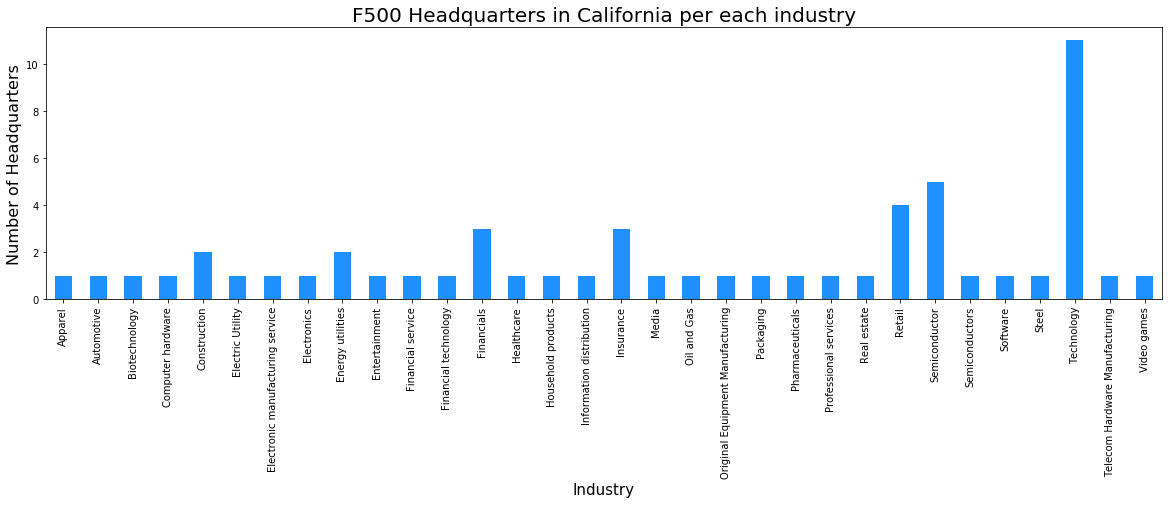

In [224]:
clr = "dodgerblue"
df_caFinal.groupby('Industry')['Headquarters'].count().plot.bar(figsize=(20,5), color=clr)
plt.title('F500 Headquarters in California per each industry', fontsize = 20)
plt.xlabel('Industry', fontsize = 15)
plt.ylabel('Number of Headquarters',fontsize = 16)
plt.xticks(rotation = 'vertical')
plt.show()

## Map Generation
Here, I do one final important visualization.

First, drawing CA map.

Then, Bay Area Map.

Then, show concentration of Fortune 500 headquarters in the Bay Area (between San Francisco and San Jose)

In [230]:
# CA latitude and longitude values
latitude = 36.778259
longitude = -119.417931

# create map and display it
CA_map = folium.Map(location=[latitude, longitude], zoom_start=7)

# display the map of CA
CA_map

### ATTENTION: 
The following is an image of the map that is rendered above. Since the Github file may not show the map without running it, I took its image and inserted it as an image as well

<img src="https://www.instituteengmgt.com/wp-content/uploads/CA_Map.png">

In [226]:
# Bay Area latitude and longitude values
latitude = 37.77
longitude = -122.42

# create map and display it
BayArea_map = folium.Map(location=[latitude, longitude], zoom_start=9)

# display the map of Bay Area
BayArea_map

### ATTENTION: 
The following is an image of the map that is rendered above. Since the Github file may not show the map without running it, I took its image and inserted it as an image as well

<img src="https://www.instituteengmgt.com/wp-content/uploads/BayArea_Map.png">

## Superimpose Fortune 500 Headquarters onto the Map of Bay Area
As a final step, now we superimpose the headquarter of Fortune 500 companies that are located in the Bay Area, which was our primary goal for this project.

In [227]:
df_caFinal.head()

,Rank,Name,Industry,Headquarters,Latitude,Longitude
0,3,Apple,Electronics,"Cupertino, CA",37.323000,-122.032200
1,10,Alphabet,Technology,"Mountain View, CA",37.386051,-122.083855
2,14,Chevron,Oil and Gas,"San Ramon, CA",37.764400,-121.954000
3,29,Wells Fargo,Financials,"San Francisco, CA",37.773972,-122.431297
4,45,Intel,Technology,"Santa Clara, CA",37.354107,-121.955238


In [231]:
# instantiate a feature group for the incidents in the dataframe
F500_Headquarters = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_caFinal.Latitude, df_caFinal.Longitude):
    F500_Headquarters.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
BayArea_map.add_child(F500_Headquarters)

### ATTENTION: 
The following is an image of the map that is rendered above. Since the Github file may not show the map without running it, I took its image and inserted it as an image as well

<img src="https://www.instituteengmgt.com/wp-content/uploads/BayArea_Map_Superimposed.png">

# Discussion
This capstone project allowed to dive much deeper than any previous courses.
It revealed that Data Science as much hard and technicla skill as it is soft skill, imagination, and creativity.
While of course accurate data collectiona nd avilability is crucial, but the many ways of presenting and visualizing it is even more important.

For me, it is a strat of a new career.
I took these courses to shift my career from Agile Development of Complex Enterprise Solutions to Data Science or a hybrid of the two.

# Conclusion
This project is rather a strat of much longer journey, in which I want to collect and visualize all type of data about Fortune 500 companies.
They year by year performance, relocation of headquarters and their reasons, moving up and down the list of ranking, changes in industry, etc.
However, here, I focused on California and specifically on Bay Area as we have vested interest in it.

### One special thanks to the fellow leaner for gradign this humble work!